<a href="https://colab.research.google.com/github/ameensalim1/ecs171sfpdproject/blob/main/CodeDraft/CodeDraft2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpolicedata
import openpolicedata as opd
import pandas as pd

!pip install sodapy


In [ ]:
#using different api to access the dataset

from sodapy import Socrata
import pandas as pd


app_token = "6u2VWw6NyixoG5uL7TqcBr1Np"

# Create a Socrata client
client = Socrata("data.sfgov.org", app_token)

# Dataset identifier for the correct dataset
dataset_identifier3 = "2zdj-bwza"  # Correct identifier

# Fetch a subset of the data (1 million rows)
limit = 2000000  # Number of records to fetch

# Initialize variables for pagination
offset = 0  # Starting point
all_results = []
chunk_counter = 0

# Fetch data in chunks
while len(all_results) < limit:
    results = client.get(dataset_identifier3, limit=50000, offset=offset)
    if not results:
        break
    all_results.extend(results)
    offset += 50000
    chunk_counter += 1
    print(f"Chunk {chunk_counter} fetched, total records: {len(all_results)}")
    if len(all_results) >= limit:
        all_results = all_results[:limit]
        break

# Convert to a pandas DataFrame
data = pd.DataFrame.from_records(all_results)


# Convert 'received_datetime' to datetime if it's not already
data['received_datetime'] = pd.to_datetime(data['received_datetime'])

# Extract the year and create a new column 'year'
data['year'] = data['received_datetime'].dt.year

data_2023 = data[data['year'] == 2023]

# Display data for 2023
data = data_2023





Chunk 1 fetched, total records: 50000
Chunk 2 fetched, total records: 100000
Chunk 3 fetched, total records: 150000
Chunk 4 fetched, total records: 200000
Chunk 5 fetched, total records: 250000
Chunk 6 fetched, total records: 300000
Chunk 7 fetched, total records: 350000
Chunk 8 fetched, total records: 400000
Chunk 9 fetched, total records: 450000
Chunk 10 fetched, total records: 500000
Chunk 11 fetched, total records: 550000
Chunk 12 fetched, total records: 600000
Chunk 13 fetched, total records: 650000
Chunk 14 fetched, total records: 700000
Chunk 15 fetched, total records: 750000
Chunk 16 fetched, total records: 800000
Chunk 17 fetched, total records: 850000
Chunk 18 fetched, total records: 900000
Chunk 19 fetched, total records: 950000
Chunk 20 fetched, total records: 1000000
Chunk 21 fetched, total records: 1050000
Chunk 22 fetched, total records: 1100000
Chunk 23 fetched, total records: 1150000
Chunk 24 fetched, total records: 1200000
Chunk 25 fetched, total records: 1250000
Chun

In [ ]:
print(f"Number of data points received in 2023: {len(data_2023)}")

Number of data points received in 2023: 104186


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

districts = list(data['police_district'].unique())
districts = [district for district in districts if isinstance(district, str)]

for district in districts:
    print(f"District: {district}")
    district_neighborhoods = data.groupby('police_district')['analysis_neighborhood'].unique()


    # Iterate over each district and its neighborhoods
for district, neighborhoods in district_neighborhoods.items():
    print(f"District: {district}")
    print("Neighborhoods:")
    for neighborhood in neighborhoods:
        print(neighborhood)
    print()

timestamp_columns = ['received_datetime', 'entry_datetime', 'dispatch_datetime', 'enroute_datetime', 'onscene_datetime']

# Convert timestamp columns to datetime format with error handling
for col in timestamp_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Calculate response times
data['response_time_dispatch'] = (data['dispatch_datetime'] - data['received_datetime']).dt.total_seconds()
data['response_time_enroute'] = (data['enroute_datetime'] - data['dispatch_datetime']).dt.total_seconds()
data['response_time_onscene'] = (data['onscene_datetime'] - data['enroute_datetime']).dt.total_seconds()
data['response_time_overall'] = (data['onscene_datetime'] - data['received_datetime']).dt.total_seconds()

# Convert response time columns to numeric
response_time_columns = ['response_time_dispatch', 'response_time_enroute', 'response_time_onscene', 'response_time_overall']
for col in response_time_columns:
    data[col] = data[col].astype(float)

# Group by location and calculate average response times
location_column = 'police_district'
response_times_by_location = data.groupby(location_column)[response_time_columns].mean()

# Find the location with the minimum average response time for each category
fastest_dispatch_location = response_times_by_location['response_time_dispatch'].idxmin()
fastest_enroute_location = response_times_by_location['response_time_enroute'].idxmin()
fastest_onscene_location = response_times_by_location['response_time_onscene'].idxmin()
fastest_overall_location = response_times_by_location['response_time_overall'].idxmin()

# Print the results
print("Fastest response times by location:")
print(f"Dispatch: {fastest_dispatch_location}")
print(f"Enroute: {fastest_enroute_location}")
print(f"Onscene: {fastest_onscene_location}")
print(f"Overall: {fastest_overall_location}")

# Group by police district and calculate average response times
response_times_by_district = data.groupby('police_district')[response_time_columns].mean()
print(response_times_by_district)



District: BAYVIEW
District: SOUTHERN
District: TARAVAL
District: MISSION
District: TENDERLOIN
District: PARK
District: NORTHERN
District: INGLESIDE
District: CENTRAL
District: RICHMOND
District: BAYVIEW
Neighborhoods:
Potrero Hill
Bayview Hunters Point
Portola
McLaren Park
Excelsior
Bernal Heights

District: CENTRAL
Neighborhoods:
Financial District/South Beach
Tenderloin
Russian Hill
Nob Hill
North Beach
Chinatown

District: INGLESIDE
Neighborhoods:
Excelsior
McLaren Park
Portola
Bernal Heights
Outer Mission
Noe Valley
Visitacion Valley
Oceanview/Merced/Ingleside
West of Twin Peaks
Glen Park
Bayview Hunters Point
Twin Peaks

District: MISSION
Neighborhoods:
Mission
Castro/Upper Market
Noe Valley
Twin Peaks
Bernal Heights

District: NORTHERN
Neighborhoods:
Tenderloin
Western Addition
Hayes Valley
Nob Hill
Russian Hill
Marina
Pacific Heights
Japantown
Haight Ashbury
Presidio

District: PARK
Neighborhoods:
Haight Ashbury
Inner Sunset
Lone Mountain/USF
Western Addition
Golden Gate Park
Tw

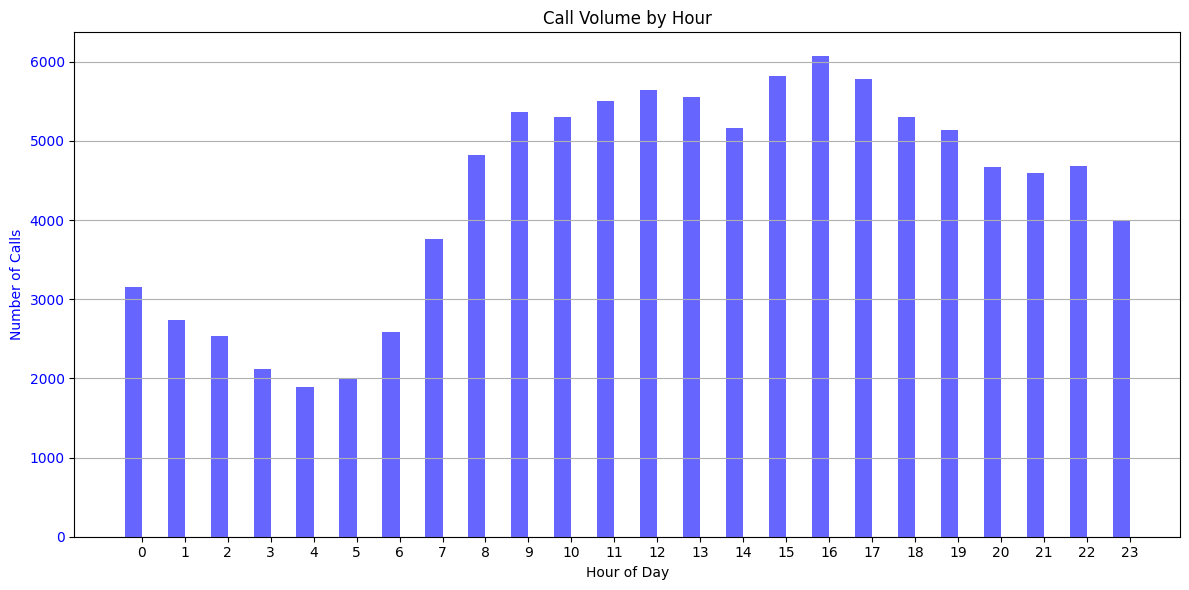

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert timestamp columns to datetime format with error handling
for col in timestamp_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Extract hour from received_datetime
data['hour'] = data['received_datetime'].dt.hour

# Group by hour to count the number of calls and calculate average response times
calls_by_hour = data.groupby('hour').size()

# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar graph for call frequency
width = 0.4
x = np.arange(len(calls_by_hour.index))

ax1.bar(x - width / 2, calls_by_hour, width, color='b', alpha=0.6, label='Call Frequency')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Number of Calls', color='b')
ax1.set_xticks(x)
ax1.set_xticklabels(calls_by_hour.index)
ax1.tick_params(axis='y', labelcolor='b')


plt.title('Call Volume by Hour')
fig.tight_layout()
plt.grid(True, axis='y')

plt.show()


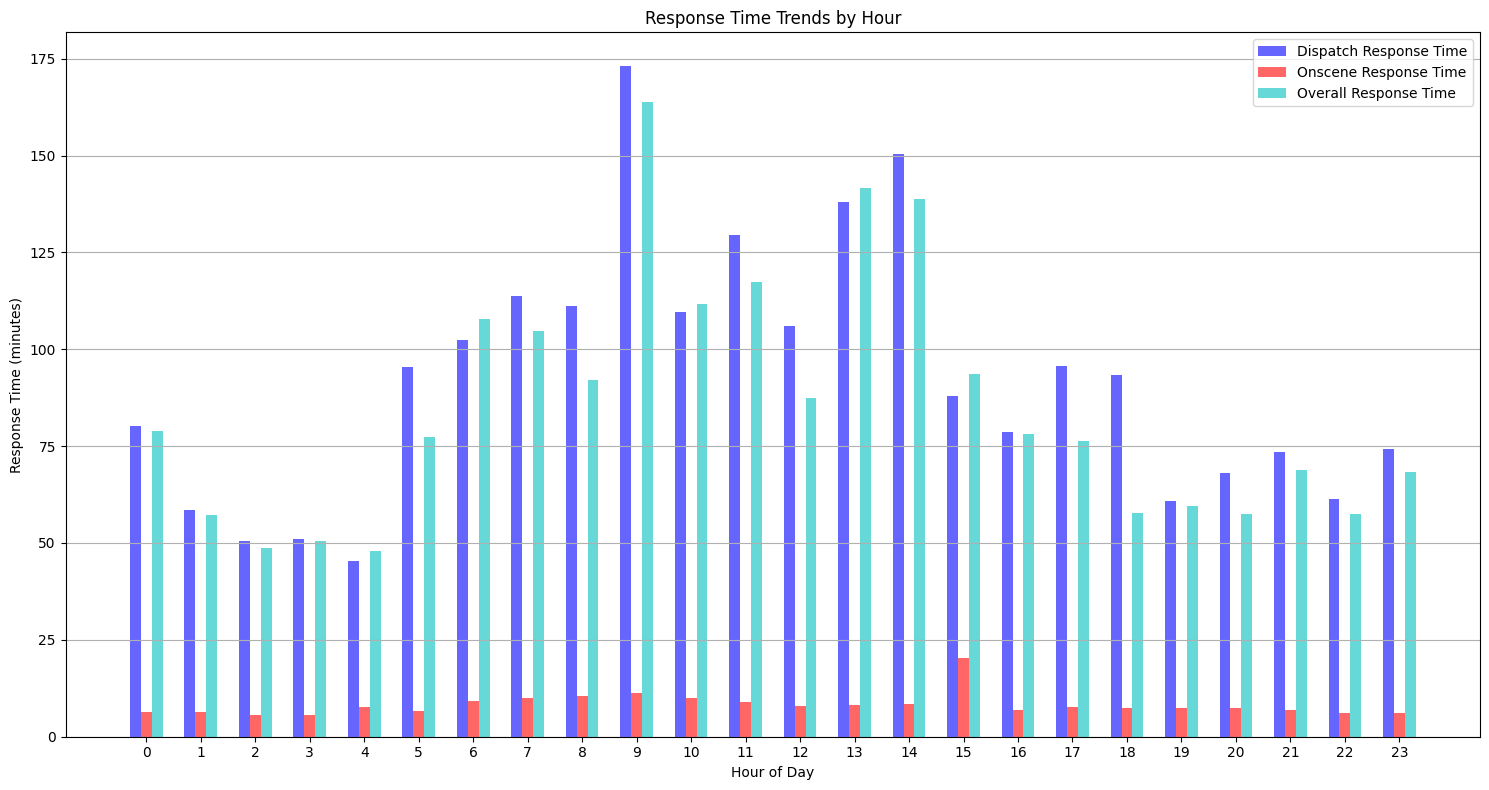

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


timestamp_columns = ['received_datetime', 'entry_datetime', 'dispatch_datetime', 'enroute_datetime', 'onscene_datetime']

# Convert timestamp columns to datetime format with error handling
for col in timestamp_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Calculate response times
data['response_time_dispatch'] = (data['dispatch_datetime'] - data['received_datetime']).dt.total_seconds() / 60
data['response_time_onscene'] = (data['onscene_datetime'] - data['dispatch_datetime']).dt.total_seconds() / 60
data['response_time_overall'] = (data['onscene_datetime'] - data['received_datetime']).dt.total_seconds() / 60

# Convert response time columns to numeric
response_time_columns = ['response_time_dispatch', 'response_time_onscene', 'response_time_overall']
for col in response_time_columns:
    data[col] = data[col].astype(float)

# Extract hour from received_datetime
data['hour'] = data['received_datetime'].dt.hour

# Group by hour to calculate average response times
avg_response_times_by_hour = data.groupby('hour')[response_time_columns].mean()

# Plotting the data
fig, ax = plt.subplots(figsize=(15, 8))

width = 0.2  # Width of the bars
x = np.arange(len(avg_response_times_by_hour.index))

# Plot each response time metric as a separate group of bars
ax.bar(x - width, avg_response_times_by_hour['response_time_dispatch'], width, label='Dispatch Response Time', color='b', alpha=0.6)
ax.bar(x, avg_response_times_by_hour['response_time_onscene'], width, label='Onscene Response Time', color='r', alpha=0.6)
ax.bar(x + width, avg_response_times_by_hour['response_time_overall'], width, label='Overall Response Time', color='c', alpha=0.6)

ax.set_xlabel('Hour of Day')
ax.set_ylabel('Response Time (minutes)')
ax.set_title('Response Time Trends by Hour')
ax.set_xticks(x)
ax.set_xticklabels(avg_response_times_by_hour.index)
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


<Axes: title={'center': 'District-wise Frequency of Calls for Service'}, xlabel='police_district', ylabel='Number of calls'>

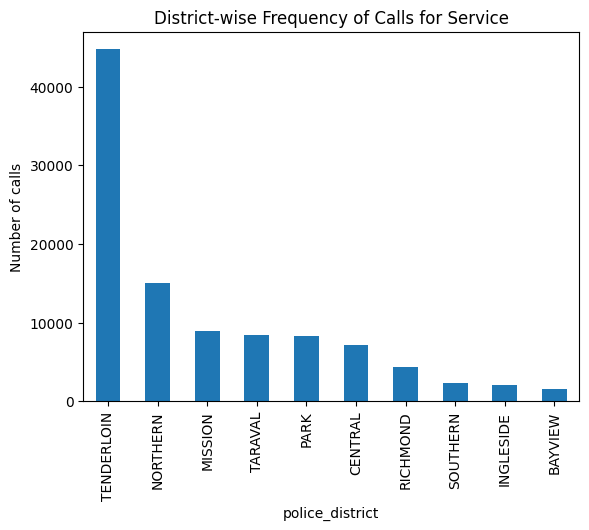

In [ ]:
# Grabbing relevant data from dataset and cleaning:
district_frequency = data.loc[:, ['police_district', 'received_datetime']]
district_frequency.loc[:, 'day_of_week'] = district_frequency['received_datetime'].dt.dayofweek
district_frequency = district_frequency.dropna()

# Plotting:
fig, ax = plt.subplots()
plt.title("District-wise Frequency of Calls for Service")
plt.ylabel("Number of calls")
district_frequency['police_district'].value_counts().plot(ax=ax, kind='bar')

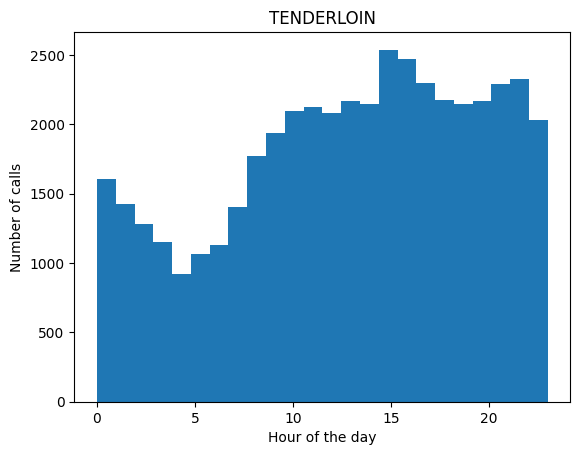

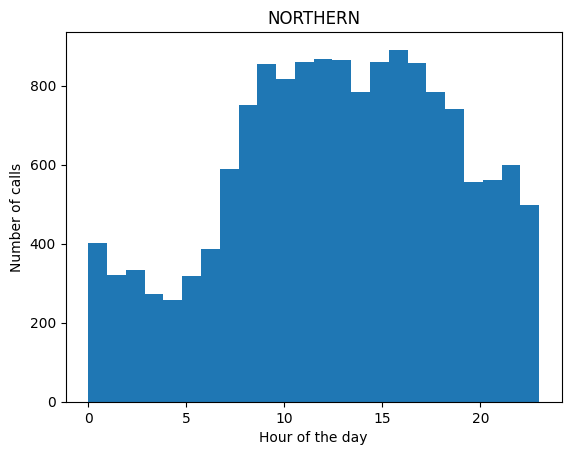

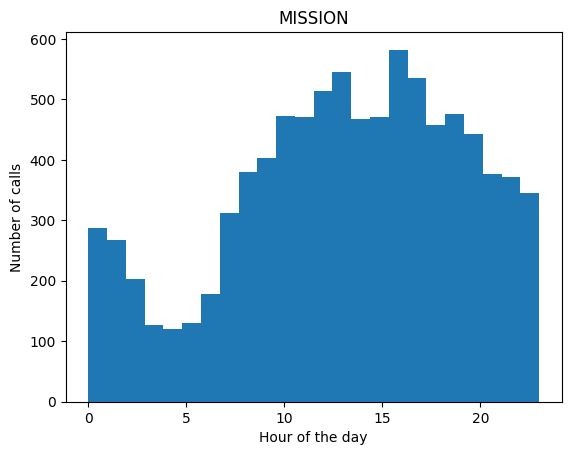

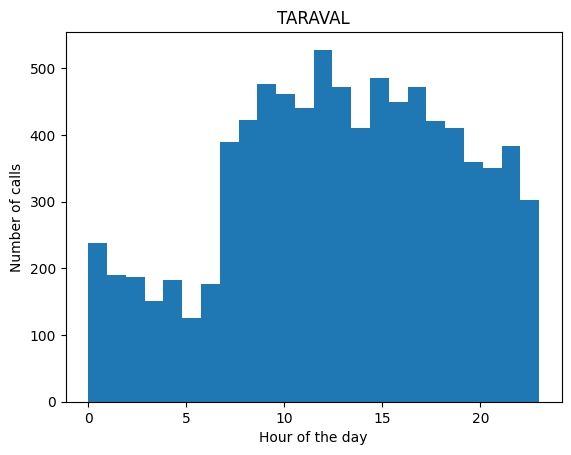

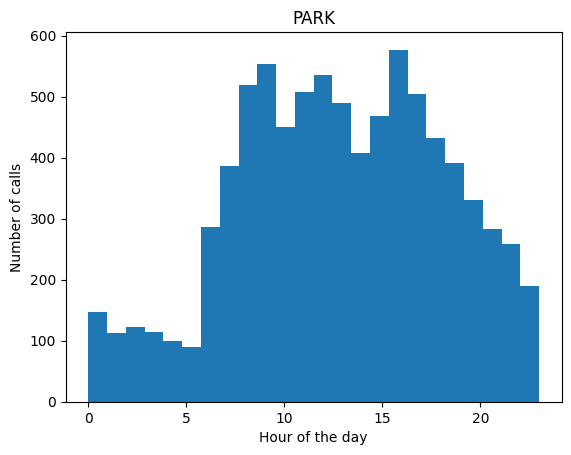

In [ ]:
# Creating a list of target districts:
target_districts = ['TENDERLOIN', 'NORTHERN', 'MISSION', 'TARAVAL', 'PARK']

# Looping and plotting each one:
for target_district in target_districts:
  target_subset = district_frequency[district_frequency['police_district'].isin([target_district])]
  x = target_subset['received_datetime'].dt.hour
  fig, ax = plt.subplots()
  plt.hist(x, bins = 24)
  plt.title(target_district)
  plt.ylabel("Number of calls")
  plt.xlabel("Hour of the day")
  plt.show()

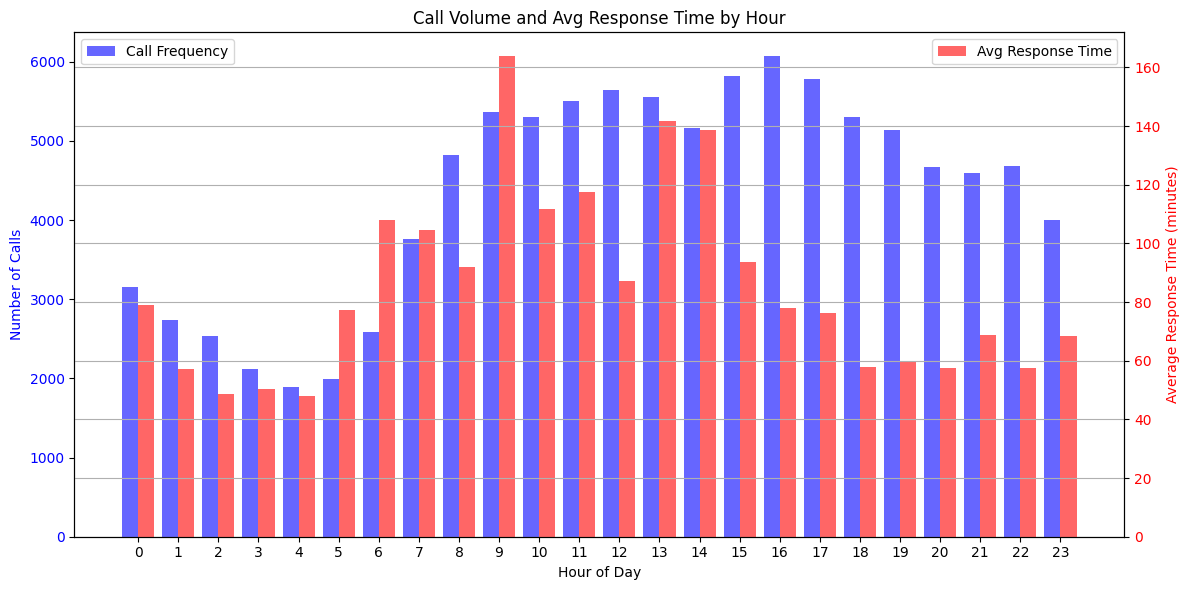

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


timestamp_columns = ['received_datetime', 'entry_datetime', 'dispatch_datetime', 'enroute_datetime', 'onscene_datetime']

# Convert timestamp columns to datetime format with error handling
for col in timestamp_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Calculate average response time
data['response_time_overall'] = (data['onscene_datetime'] - data['received_datetime']).dt.total_seconds()/60

# Convert response time columns to numeric
response_time_columns = ['response_time_dispatch', 'response_time_enroute', 'response_time_onscene', 'response_time_overall']
for col in response_time_columns:
    data[col] = data[col].astype(float)

# Extract hour from received_datetime
data['hour'] = data['received_datetime'].dt.hour

# Group by hour to count the number of calls and calculate average response times
calls_by_hour = data.groupby('hour').size()
avg_response_time_by_hour = data.groupby('hour')['response_time_overall'].mean()

# Plotting the data as bar graphs
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar graph for call frequency
width = 0.4
x = np.arange(len(calls_by_hour.index))

ax1.bar(x - width/2, calls_by_hour, width, color='b', alpha=0.6, label='Call Frequency')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Number of Calls', color='b')
ax1.set_xticks(x)
ax1.set_xticklabels(calls_by_hour.index)
ax1.tick_params(axis='y', labelcolor='b')

# Bar graph for average response time
ax2 = ax1.twinx()
ax2.bar(x + width/2, avg_response_time_by_hour, width, color='r', alpha=0.6, label='Avg Response Time')
ax2.set_ylabel('Average Response Time (minutes)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Call Volume and Avg Response Time by Hour')
fig.tight_layout()
plt.grid(True, axis='y')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


### This is our algorithm to calculate police allocation for an inputted district:

In [ ]:
from sklearn.preprocessing import StandardScaler
def police_allocation(num_police_vehicles, hour_of_day, district_for_allocation):
  # Grabbing requested district:
  data_subset = data.loc[data['police_district'].isin([district_for_allocation])].copy()
  # Grabbing relevant hour range:
  data_subset['hour'] = data['received_datetime'].dt.hour
  if 0 <= hour_of_day < 8:
    filtered_data_subset = data_subset[(data_subset['hour'] >= 0) & (data_subset['hour'] < 8)]
  elif 8 <= hour_of_day < 16:
    filtered_data_subset = data_subset[(data_subset['hour'] >= 8) & (data_subset['hour'] < 16)]
  else:
    filtered_data_subset = data_subset[(data_subset['hour'] >= 16) & (data_subset['hour'] <= 23 )]

  # Calculating the frequency of calls for service for each neighborhood in the district:
  neighborhood_frequency = filtered_data_subset['analysis_neighborhood'].value_counts()
  # Summing the frequencies for ratio calculation:
  sum_frequencies = neighborhood_frequency.sum()
  # Creating and populating a dictionary with the ratios:
  neighborhood_ratios = {}
  for neighborhood, count in neighborhood_frequency.items():
    ratio = count / sum_frequencies
    neighborhood_ratios[neighborhood] = ratio

  # Creating a response time columns to use for composite score calculation:
  filtered_data_subset['onscene_datetime'] = pd.to_datetime(filtered_data_subset['onscene_datetime'], errors='coerce')
  filtered_data_subset['response_time_minutes'] = (filtered_data_subset['onscene_datetime'] - filtered_data_subset['received_datetime']).dt.total_seconds() / 60
  # Group by district and neighborhood
  neighborhood_summary = filtered_data_subset.groupby(['police_district', 'analysis_neighborhood']).agg({
    'response_time_minutes': 'mean',  # Average response time in minutes
    'cad_number': 'count'  # Count of incidents as incident count
  }).reset_index()


  neighborhood_summary.rename(columns={
    'response_time_minutes': 'average_response_time',
    'cad_number': 'incident_count'
  }, inplace=True)

  # Normalization
  scaler = StandardScaler()
  neighborhood_summary['normalized_incidents'] = scaler.fit_transform(neighborhood_summary[['incident_count']])
  neighborhood_summary['normalized_response'] = scaler.fit_transform(neighborhood_summary[['average_response_time']])

  #applying weights
  weight_for_incidents = 0.5
  weight_for_response_time = 0.5

  # Normalize both incident count and response time
  max_incidents = neighborhood_summary['incident_count'].max()
  max_response_time = neighborhood_summary['average_response_time'].max()

  neighborhood_summary['normalized_incidents'] = neighborhood_summary['incident_count'] / max_incidents
  neighborhood_summary['normalized_response_time'] = neighborhood_summary['average_response_time'] / max_response_time

  # Calculate a composite score
  neighborhood_summary['composite_score'] = (weight_for_incidents * neighborhood_summary['normalized_incidents']) \
                                          + (weight_for_response_time * (1 - neighborhood_summary['normalized_response_time']))
  highest_composite_score = neighborhood_summary['composite_score'].max()


  # Using composite score to balance the police allocation ratio so that response time can be more stabilized through the neighborhoods:
  neighborhood_summary['police_allocation_ratio'] = (neighborhood_summary['incident_count']/sum_frequencies) + ((highest_composite_score - neighborhood_summary['composite_score'])/10)
  total = neighborhood_summary['police_allocation_ratio'].sum() - 1


  # Assigning vehicles:
  max_index = neighborhood_summary['police_allocation_ratio'].idxmax()
  neighborhood_summary.loc[max_index, 'police_allocation_ratio'] -= total
  neighborhood_summary['vehicle_assignment'] = np.floor(neighborhood_summary['police_allocation_ratio']*num_police_vehicles)
  return neighborhood_summary



In [ ]:
import folium
from folium.plugins import HeatMap

# Create a base map centered on San Francisco
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

# Extract the latitude and longitude from the 'intersection_point' column of our dataset
data_subset = data[['intersection_point', 'police_district']]
data_subset = data_subset.dropna()  # Remove rows with missing values

# Extract the latitude and longitude values
data_subset['latitude'] = data_subset['intersection_point'].apply(lambda x: x['coordinates'][1] if isinstance(x, dict) and 'coordinates' in x else None)
data_subset['longitude'] = data_subset['intersection_point'].apply(lambda x: x['coordinates'][0] if isinstance(x, dict) and 'coordinates' in x else None)

# Remove rows with missing latitude or longitude values
data_subset = data_subset.dropna(subset=['latitude', 'longitude'])

# Create a list of latitude and longitude pairs
locations = data_subset[['latitude', 'longitude']].values.tolist()

# Add the heatmap layer to the map with adjusted radius and opacity
HeatMap(locations, radius=10, blur=15, max_zoom=1, min_opacity=0.5).add_to(sf_map)

# Define target districts
target_districts = ['TENDERLOIN', 'NORTHERN', 'MISSION', 'TARAVAL', 'PARK', 'CENTRAL','RICHMOND','SOUTHERN','INGLESIDE','BAYVIEW']

# Calculate the center points of each district for labeling
district_centers = data_subset.groupby('police_district')[['latitude', 'longitude']].mean().reset_index()

# Filter for target districts
filtered_district_centers = district_centers[district_centers['police_district'].isin(target_districts)]

# Add bold labels for each district
for _, row in filtered_district_centers.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.DivIcon(html=f"""<div style="font-size: 8pt; font-weight: bold;">{row['police_district']}</div>""")
    ).add_to(sf_map)


# Add a heatmap legend
legend_html = '''
     <div style="position: fixed;
     bottom: 50px; left: 50px; width: 150px; height: 200px;
     background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
     &nbsp;<b>Heat Map Legend</b><br>
     &nbsp;<i class="fa fa-square" style="color: #b3cde3"></i>&nbsp;Very Low<br>
     &nbsp;<i class="fa fa-square" style="color: #6497b1"></i>&nbsp;Low<br>
     &nbsp;<i class="fa fa-square" style="color: #005b96"></i>&nbsp;Medium-Low<br>
     &nbsp;<i class="fa fa-square" style="color: #009933"></i>&nbsp;Medium<br>
     &nbsp;<i class="fa fa-square" style="color: #33cc33"></i>&nbsp;Medium-High<br>
     &nbsp;<i class="fa fa-square" style="color: #ffeda0"></i>&nbsp;High<br>
     &nbsp;<i class="fa fa-square" style="color: #feb24c"></i>&nbsp;Very High<br>
     </div>a fa-square" style="color: #bd0026"></i>&nbsp;High<br>
     </div>
     '''

sf_map.get_root().html.add_child(folium.Element(legend_html))


# Display the map
sf_map
